In [4]:
import pandas as pd
import numpy  as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [5]:
car = pd.read_csv('car data.csv')
car.columns = [i.lower() for i in car.columns]
print('Number of rows : ',car.shape[0])
print('Number of cols : ',car.shape[1])
car.head()

Number of rows :  301
Number of cols :  9


,car_name,year,selling_price,present_price,kms_driven,fuel_type,seller_type,transmission,owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [6]:
car.describe().T

,count,mean,std,min,25%,50%,75%,max
year,301.0,2013.627907,2.891554,2003.00,2012.0,2014.0,2016.0,2018.0
selling_price,301.0,4.661296,5.082812,0.10,0.9,3.6,6.0,35.0
present_price,301.0,7.628472,8.644115,0.32,1.2,6.4,9.9,92.6
kms_driven,301.0,36947.205980,38886.883882,500.00,15000.0,32000.0,48767.0,500000.0
owner,301.0,0.043189,0.247915,0.00,0.0,0.0,0.0,3.0


# let's check whether our dataset has  null values or not 

In [7]:
print("Total Number of Null values present in dataset : ",car.isnull().sum().sum())

Total Number of Null values present in dataset :  0


# EDA

# <font color='red' size = 30px> Univariate Analysis  </font>

# Top 10 vehicle's which are available for sales

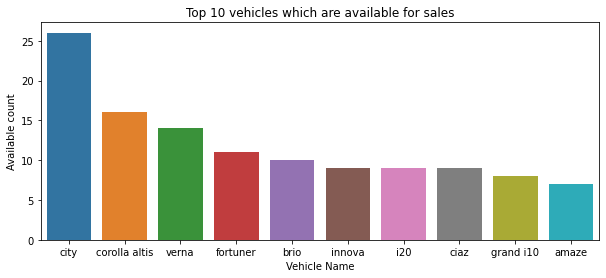

In [8]:
plt.figure(figsize = (10,4))
x_val = car.car_name.value_counts().head(10).index
y_val = car.car_name.value_counts().head(10).values
sns.barplot(x = x_val,y = y_val)
plt.title("Top 10 vehicles which are available for sales")
plt.ylabel("Available count")
plt.xlabel('Vehicle Name')
plt.show()

# Which fuel type engine is adopted in most of the car's 

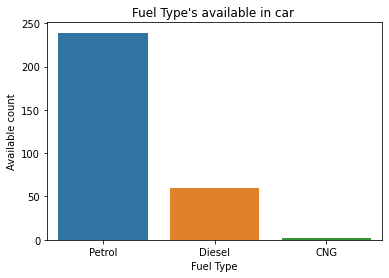

In [9]:
sns.countplot(car['fuel_type'])
plt.title("Fuel Type's available in car ")
plt.ylabel("Available count")
plt.xlabel('Fuel Type')
plt.show()

# Which transmission type is adopted in most of the car's 

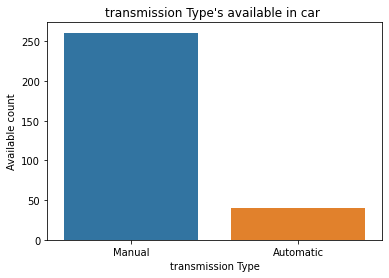

In [10]:
sns.countplot(car['transmission'])
plt.title("transmission Type's available in car ")
plt.ylabel("Available count")
plt.xlabel('transmission Type')
plt.show()

# Present Price Distribution 

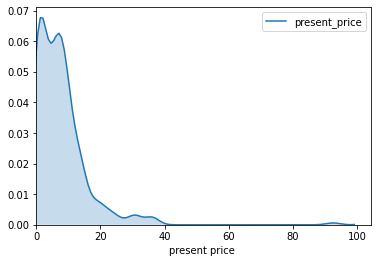

In [11]:
sns.kdeplot(car['present_price'],shade = True).set(xlim=(0))
plt.xlabel("present price ")
plt.show()

# KmsDriven Distribution

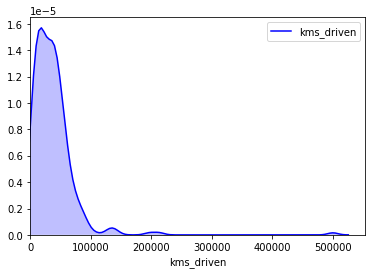

In [12]:
sns.kdeplot(car['kms_driven'],shade = True,color = 'blue').set(xlim=(0))
plt.xlabel("kms_driven")
plt.show()

# <font color='red' size = 30px> Bivariate Analysis  </font>

# selling_price v/s present_price (using scatter chart )

*  insight : there is a linear relationship between selling price ( target ) and present price . and also  we some outlier as you can see in the below chart ( let's fix it here )

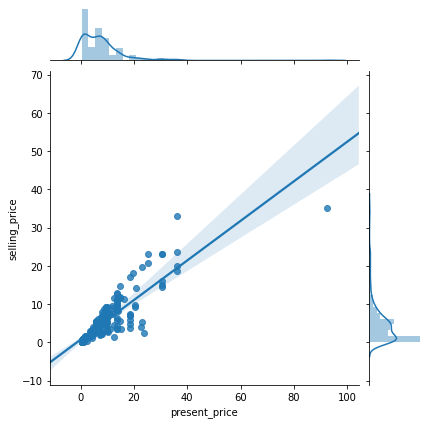

In [13]:
sns.jointplot(x = car['present_price'],y = car['selling_price'],kind = 'reg')
plt.xlabel('present_price')
plt.ylabel("selling_price")
plt.show()

In [14]:
# variable present_price has an outlier i.e value =  92.6

print("present price max value : ", car.present_price.max())
car[car['present_price'] ==92.6].iloc[:,:]

present price max value :  92.6


,car_name,year,selling_price,present_price,kms_driven,fuel_type,seller_type,transmission,owner
86,land cruiser,2010,35.0,92.6,78000,Diesel,Dealer,Manual,0


In [15]:
# ill drop it 
car.drop(86,axis = 0, inplace = True) 

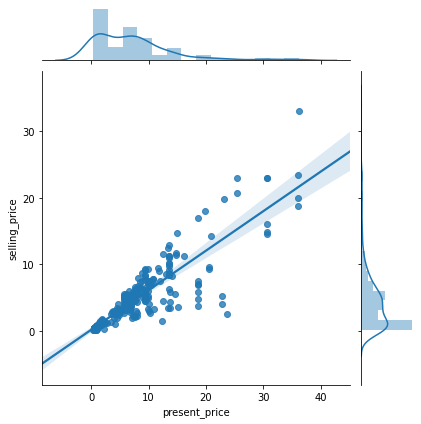

In [16]:
# after removing outlier from present price . 
sns.jointplot(x = car['present_price'],y = car['selling_price'],kind = 'reg')
plt.xlabel('present_price')
plt.ylabel("selling_price")
plt.show()

# selling_price v/s present_price (based on number of owners ) 
 

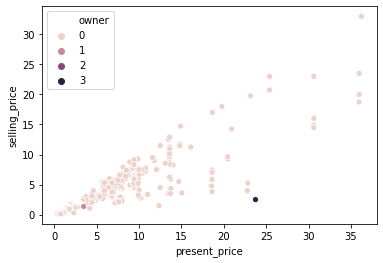

In [17]:
sns.scatterplot(x = car['present_price'],y = car['selling_price'],hue = car['owner'])
# although number of owners not contributing anything towards output !.
plt.show()

# selling_price v/s present_price (using kdeplot)

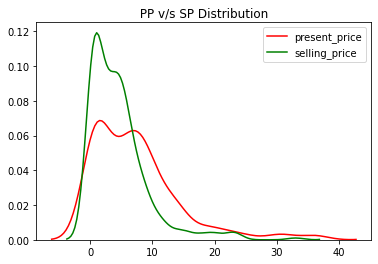

In [18]:
sns.kdeplot(car['present_price'],color = 'red')
sns.kdeplot(car['selling_price'],color = 'green')
plt.title(' PP v/s SP Distribution ')
plt.show()

# kms_driven v/s selling_price
* insight : higher the selling price lesser the KmsDriven 

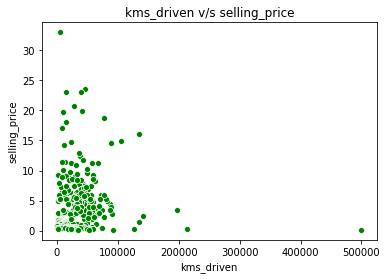

In [19]:
sns.scatterplot(x = car['kms_driven'],y = car['selling_price'],color = 'green')
plt.title('kms_driven v/s selling_price')
plt.show()

In [20]:
car.head()

,car_name,year,selling_price,present_price,kms_driven,fuel_type,seller_type,transmission,owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [21]:
# Let's create one more variable called yearsold i.e (present year - year vehicle bought )
# 2020 - because it's present here 
car['year_old'] = 2020 - car['year']
car.head(3)

,car_name,year,selling_price,present_price,kms_driven,fuel_type,seller_type,transmission,owner,year_old
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,3


In [22]:
# let's drop variables ['car_name','year','owner'] from the dataset 
car.drop(['car_name','year','owner'],axis = 1 ,inplace = True)
car.head()

,selling_price,present_price,kms_driven,fuel_type,seller_type,transmission,year_old
0,3.35,5.59,27000,Petrol,Dealer,Manual,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,6


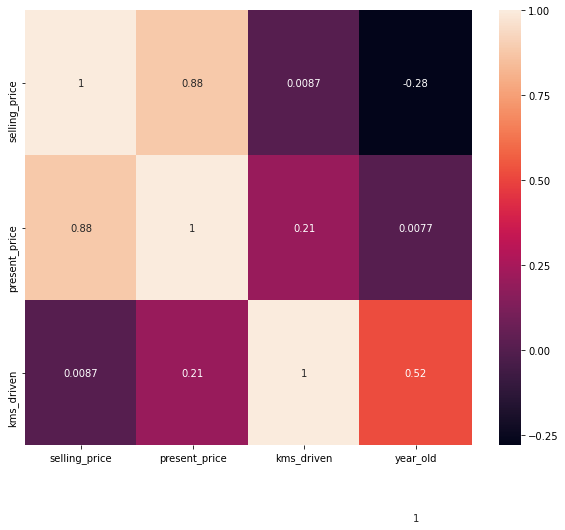

In [23]:
plt.figure(figsize = (10,8))
df_corr = car.corr()
ax = sns.heatmap(df_corr, annot=True)
ax.set_ylim(3, 0)
plt.show()

# let's convert categorical varaible into numerical variable 

In [24]:
car.head(2)

,selling_price,present_price,kms_driven,fuel_type,seller_type,transmission,year_old
0,3.35,5.59,27000,Petrol,Dealer,Manual,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,7


In [25]:
car = pd.get_dummies(car,drop_first  = True )
car.head()

,selling_price,present_price,kms_driven,year_old,fuel_type_Diesel,fuel_type_Petrol,seller_type_Individual,transmission_Manual
0,3.35,5.59,27000,6,0,1,0,1
1,4.75,9.54,43000,7,1,0,0,1
2,7.25,9.85,6900,3,0,1,0,1
3,2.85,4.15,5200,9,0,1,0,1
4,4.60,6.87,42450,6,1,0,0,1


In [26]:
# rename column from selling price to target price
car.rename(columns = {"selling_price":"target"},inplace = True,)

In [27]:
car.head(2)

,target,present_price,kms_driven,year_old,fuel_type_Diesel,fuel_type_Petrol,seller_type_Individual,transmission_Manual
0,3.35,5.59,27000,6,0,1,0,1
1,4.75,9.54,43000,7,1,0,0,1


<font color='red' size =17px> Spliting Target and inputs </font>

In [28]:
from sklearn.metrics import mean_squared_error,r2_score

In [29]:
x = car.drop('target',axis = 1 )
y = car['target']

In [30]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.3,random_state = 33)

### Linear Regression 

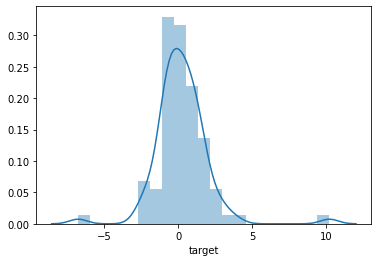

In [31]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(xtrain,ytrain)
ypred = lr.predict(xtest)
sns.distplot(ytest - ypred )
plt.show()

In [32]:
r2_val  = r2_score(ytest,ypred)
n = len(ytest)
k = xtest.shape[1]
adj_r2_score = 1 - (((1-r2_val)*(n-1)) / (n - k -1 ))
print("MSE          : ",mean_squared_error(ytest,ypred))
print("r2_score     : ",r2_val)
print("adj_r2_score : ",adj_r2_score)

MSE          :  3.281151564110028
r2_score     :  0.8746476934400806
adj_r2_score :  0.8639468867825265


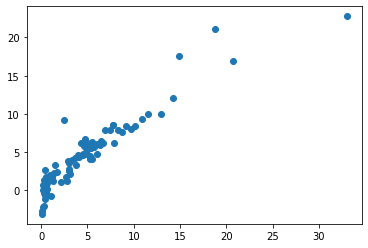

In [33]:
plt.scatter(ytest,ypred)

### RandomForestRegressor 

In [34]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

In [35]:
rf = RandomForestRegressor()
params = {
          'n_estimators' :  [50,100,120,150],
          "criterion"    :  ['mse','mae'],
          'min_samples_split' :[i for i in range(4,16)],
          'min_samples_leaf'  : [i for i in range(4,16)]
         }
rf = RandomizedSearchCV(rf,param_distributions = params,cv = 10)
rf.fit(xtrain,ytrain)
rf.best_params_

{'n_estimators': 100,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'criterion': 'mae'}

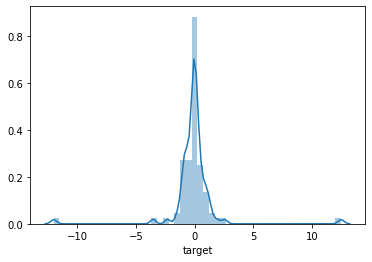

In [36]:
ypred = rf.predict(xtest)
sns.distplot(ytest - ypred)
plt.show()

In [37]:
r2_val  = r2_score(ytest,ypred)
n = len(ytest)
k = xtest.shape[1]
adj_r2_score = 1 - (((1-r2_val)*(n-1)) / (n - k -1 ))
print("MSE          : ",mean_squared_error(ytest,ypred))
print("r2_score     : ",r2_val)
print("adj_r2_score : ",adj_r2_score)

MSE          :  4.000991769277777
r2_score     :  0.8471470954612068
adj_r2_score :  0.8340986767810659


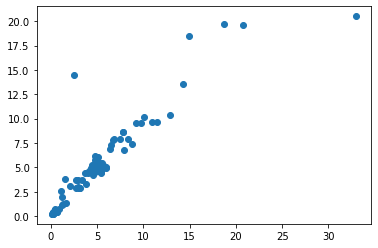

In [38]:
plt.scatter(ytest,ypred)

### Well accuracy of linear reg is better compared to randomforestregressor , so i will use linear regression

In [39]:
# saving the model to the local file system
filename = 'finalized_model.pickle'
pickle.dump(lr, open(filename, 'wb'))